In [1]:
import numpy as np
from keras.models import Model
from keras.layers import Input, SimpleRNN, Dense, LSTM
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


many-to-one 문제

입력 데이터 형식 : `(nb_samples, timesteps, input_dim)`

`nb_samples` : 전체 자료의 수

`timesteps` : 시퀀스의 길이

`input_dim` : x벡터의 크기

[0.1, 0.2, 0.3] = [0.4]

[0.2, 0.3, 0.4] = [0.5]

[0.3, 0.4, 0.5] = [0.6]

[0.4, 0.5, 0.6] = [0.7]

In [2]:
x = np.array([[[0.1], [0.2], [0.3]], [[0.2], [0.3], [0.4]], [[0.3], [0.4], [0.5]], [[0.4], [0.5], [0.6]]], dtype=np.float32)
y = np.array([[0.4], [0.5], [0.6], [0.7]], dtype=np.float32)

print('[Shape]')
print('x : {}, y : {}'.format(x.shape, y.shape))

[Shape]
x : (4, 3, 1), y : (4, 1)


In [3]:
input_layer = Input(shape=(3,1), name='input')
rnn_layer = SimpleRNN(100, name='RNN', activation='relu')(input_layer)
output_layer = Dense(1, name='output', activation="linear")(rnn_layer)

model = Model(input_layer, output_layer)

print(model.summary())

model.compile(loss='mse', optimizer='adam')
model._name = 'm_to_o'




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3, 1)              0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 100)               10200     
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________
None



In [4]:
model.fit(x, y, epochs=100, batch_size=1, verbose=0)

print('Training result')
print(model.predict(x))

print('\nTest result')
print(model.predict(np.array([[[0.5], [0.6], [0.7]]], dtype=np.float32)))









Training result
[[0.39999402]
 [0.49985087]
 [0.59992796]
 [0.70033187]]

Test result
[[0.8011051]]


In [5]:
input_layer = Input(shape=(3,1), name='input')
rnn_layer = SimpleRNN(100, return_sequences=True, name='RNN', activation='relu')(input_layer)
rnn2_layer = SimpleRNN(100, name='RNN2', activation='relu')(rnn_layer)
output_layer = Dense(1, name='output', activation="linear")(rnn2_layer)

model = Model(input_layer, output_layer)

print(model.summary())

model.compile(loss='mse', optimizer='adam')
model._name = 'stacked_m_to_o'

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3, 1)              0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 3, 100)            10200     
_________________________________________________________________
RNN2 (SimpleRNN)             (None, 100)               20100     
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 30,401
Trainable params: 30,401
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.fit(x, y, epochs=100, batch_size=1, verbose=0)

print('Training result')
print(model.predict(x))

print('\nTest result')
print(model.predict(np.array([[[0.5], [0.6], [0.7]]], dtype=np.float32)))

Training result
[[0.39968723]
 [0.5004885 ]
 [0.5996431 ]
 [0.6999131 ]]

Test result
[[0.8019204]]


sin 그래프 예측하기

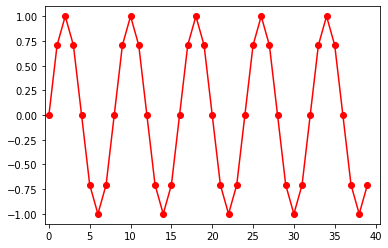

In [7]:
s = np.sin(2 * np.pi * 0.125 * np.arange(40))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 40.5)
plt.ylim(-1.1, 1.1)
plt.show()

In [8]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
print(S.shape)

(39, 40)


학습용 데이터와 테스트 데이터로 분리하기

In [9]:
X_train = S[:-10, :3][:, :, np.newaxis]
Y_train = S[:-10, 3]
X_train.shape, Y_train.shape

((29, 3, 1), (29,))

In [10]:
X_test = S[-10:-1, :3][:, :, np.newaxis]
Y_test = S[-10:-1, 3]
X_test.shape, Y_test.shape

((9, 3, 1), (9,))

In [11]:
X_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [12]:
Y_train[:4]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

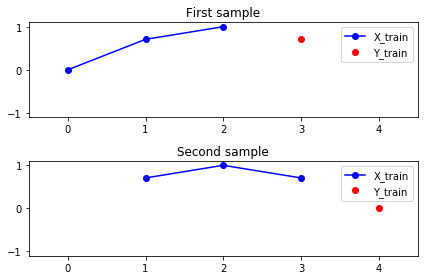

In [13]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="X_train")
plt.plot([3], Y_train[0], 'ro', label="Y_train")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample")
plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="X_train")
plt.plot([4], Y_train[1], 'ro', label="Y_train")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample")
plt.tight_layout()

In [14]:
np.random.seed(0)

input_layer = Input(shape=(3,1), name='input')
rnn_layer = SimpleRNN(100, name='RNN', activation='relu')(input_layer)
output_layer = Dense(1, name='output', activation="linear")(rnn_layer)
model = Model(input_layer, output_layer)
print(model.summary())

model.compile(loss='mse', optimizer='adam')
model._name = 'm_to_o'

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3, 1)              0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 100)               10200     
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)

`Loss`는 1 epoch를 수행하고 나온 결과와 실제 값에 대한 오차

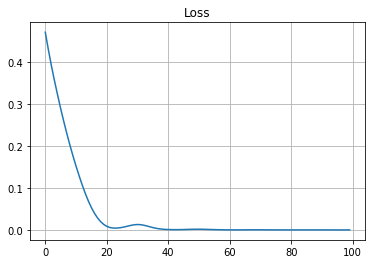

In [16]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.grid()

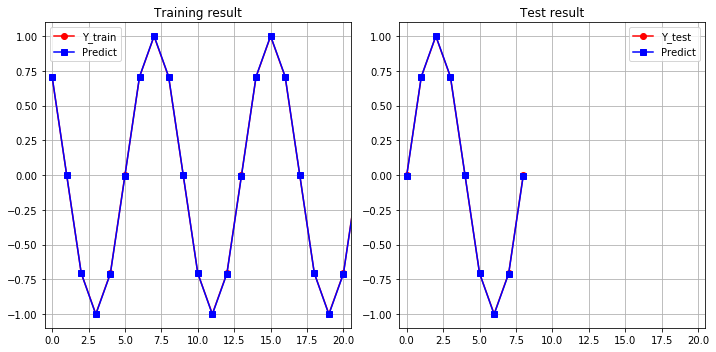

In [17]:
plt.rcParams["figure.figsize"] = (10,5)
plt.subplot(121)
plt.plot(Y_train, 'ro-', label="Y_train")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="Predict")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Training result")

plt.subplot(122)
plt.plot(Y_test, 'ro-', label="Y_test")
plt.plot(model.predict(X_test[:, :, :]), 'bs-', label="Predict")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Test result")

plt.tight_layout()